In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df  = pd.read_csv('/content/drive/MyDrive/Benkyou/datasets ML/bill_authentication.csv')
df.head(3)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [4]:
df.isna().any()

Variance    False
Skewness    False
Curtosis    False
Entropy     False
Class       False
dtype: bool

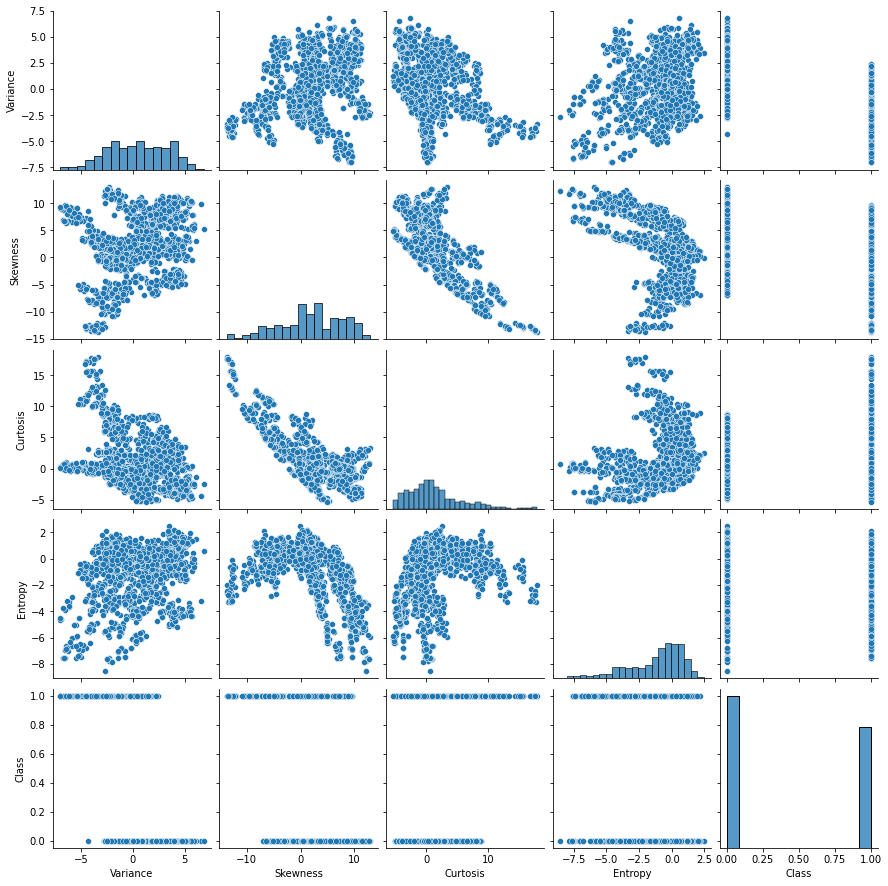

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


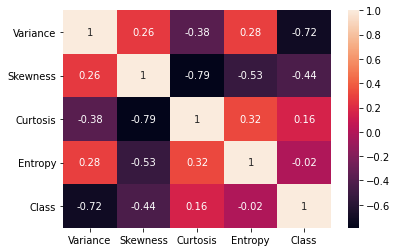

In [7]:
sns.heatmap(df.corr().round(2),annot= True)
plt.show()

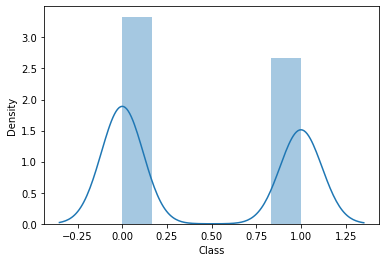

In [8]:
sns.distplot(df['Class'])
plt.show()

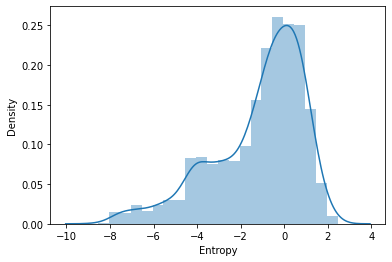

In [9]:
sns.distplot(df['Entropy'])
plt.show()

#Entrophy is right skewed 

In [10]:
#column scaling
class MinMaxScaler:
  def fit(self,data):
    minmax = []
    for i in data:
      j = (i-min(data))/(max(data)-min(data))
      minmax.append(j)

    return minmax
  def reverse_fit(self,data):
    maxmin = max(data)-min(data)
    reverse =[]
    for i in data:
      j = (maxmin*i)+min(data)
      reverse.append(j)
    return reverse



In [11]:
data = df.copy(deep=True)
scaler = MinMaxScaler()
data['Entropy'] = scaler.fit(data['Entropy'])
data['Entropy'] =scaler.reverse_fit(data['Entropy'])

#DISTPLOTS

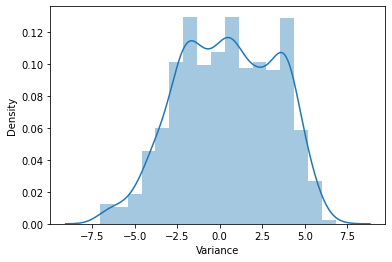

In [12]:
sns.distplot(data['Variance'])
plt.show()

#TRAIN TEST SPLIT

In [13]:
def split_test_train(x,y,train_size =0.80,seed=None):
  np.random.seed(seed)
  y=np.array(y)
  data=np.concatenate([x,y.reshape(-1,1)],axis=1)
  np.random.shuffle(data)
  xtrain=data[:int(len(data)*train_size),:-1]
  ytrain=data[:int(len(data)*train_size),-1]
  xtest=data[int(len(data)*train_size):,:-1]
  ytest=data[int(len(data)*train_size):,-1]
  return xtrain,ytrain,xtest,ytest

In [14]:
list1 =data.columns.to_list()
x =data[list1[:-1]]
y =data[list1.pop()]
xtrain ,ytrain,xtest,ytest = split_test_train(x,y,train_size=0.80,seed = 45)
print('Train data shapes \nx =',xtrain.shape,'y= ',ytrain.shape,'\nTest data shapes\nx =',xtest.shape,'y =',ytest.shape)

Train data shapes 
x = (1097, 4) y=  (1097,) 
Test data shapes
x = (275, 4) y = (275,)


#Decission Tree Regression

In [ ]:
!pip3 install -U scikit-learn scipy matplotlib

In [18]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [19]:
dtreg = DTR()
dtreg.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [20]:
y_pred = dtreg.predict(xtest)

#Visualizing result

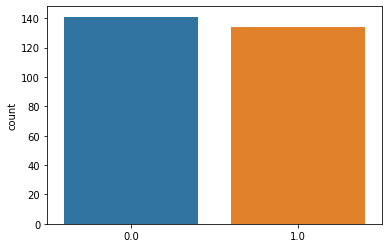

In [21]:
sns.countplot(y_pred)
plt.show()

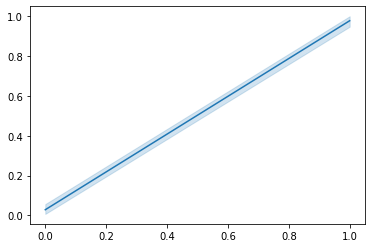

In [22]:
sns.lineplot(ytest,y_pred)
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error as msc

In [24]:
print('error = ',round(msc(ytest,y_pred),3))

error =  0.025
